<a href="https://colab.research.google.com/github/HeshamTay/Data-/blob/main/Used_Car_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Automobile_data.csv')

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
df.replace('?', np.nan, inplace=True)

In [5]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [6]:
for col in df:
  try:
    if df[col].dtype == 'object':
      df[col] = df[col].astype('float')
  except:
    ValueError
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [7]:
df.drop('symboling', axis=1, inplace=True)

In [8]:
dep = df.columns.drop('price')
df[dep] = df[dep].fillna(df[dep].mode().iloc[0])
df.dropna(subset=['price'],axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [9]:
df.isnull().sum()

normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [10]:
cat = df.select_dtypes(include='object')
num = df.select_dtypes(exclude='object')

In [11]:
cat.nunique()

make                22
fuel-type            2
aspiration           2
num-of-doors         2
body-style           5
drive-wheels         3
engine-location      2
engine-type          6
num-of-cylinders     7
fuel-system          8
dtype: int64

In [12]:
source = df.make.value_counts()
values = []
counts = []
for value, count in source.items():
  values.append(value)
  counts.append(count)


In [13]:
min_val = 0.95
percentages = [round(x/sum(counts), 2) for x in counts]
explodes = [1-x if (1-x) > min_val else 0 for x in percentages]

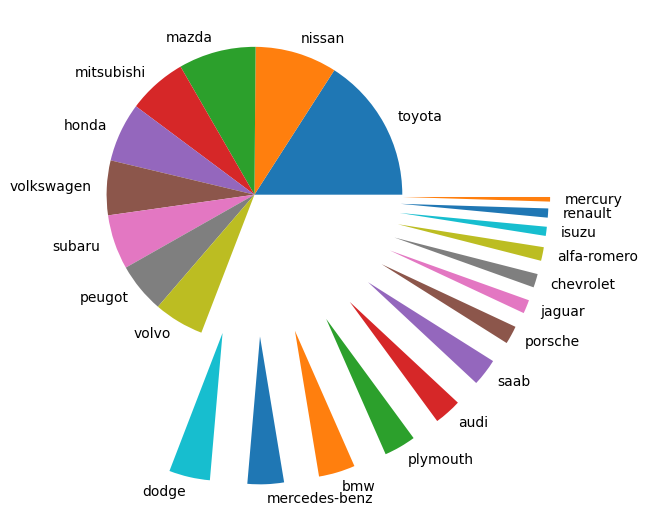

In [14]:
plt.pie(counts, labels=values, explode=explodes)
plt.show()

In [15]:
cat_graph = list(cat.drop('make', axis=1).columns)

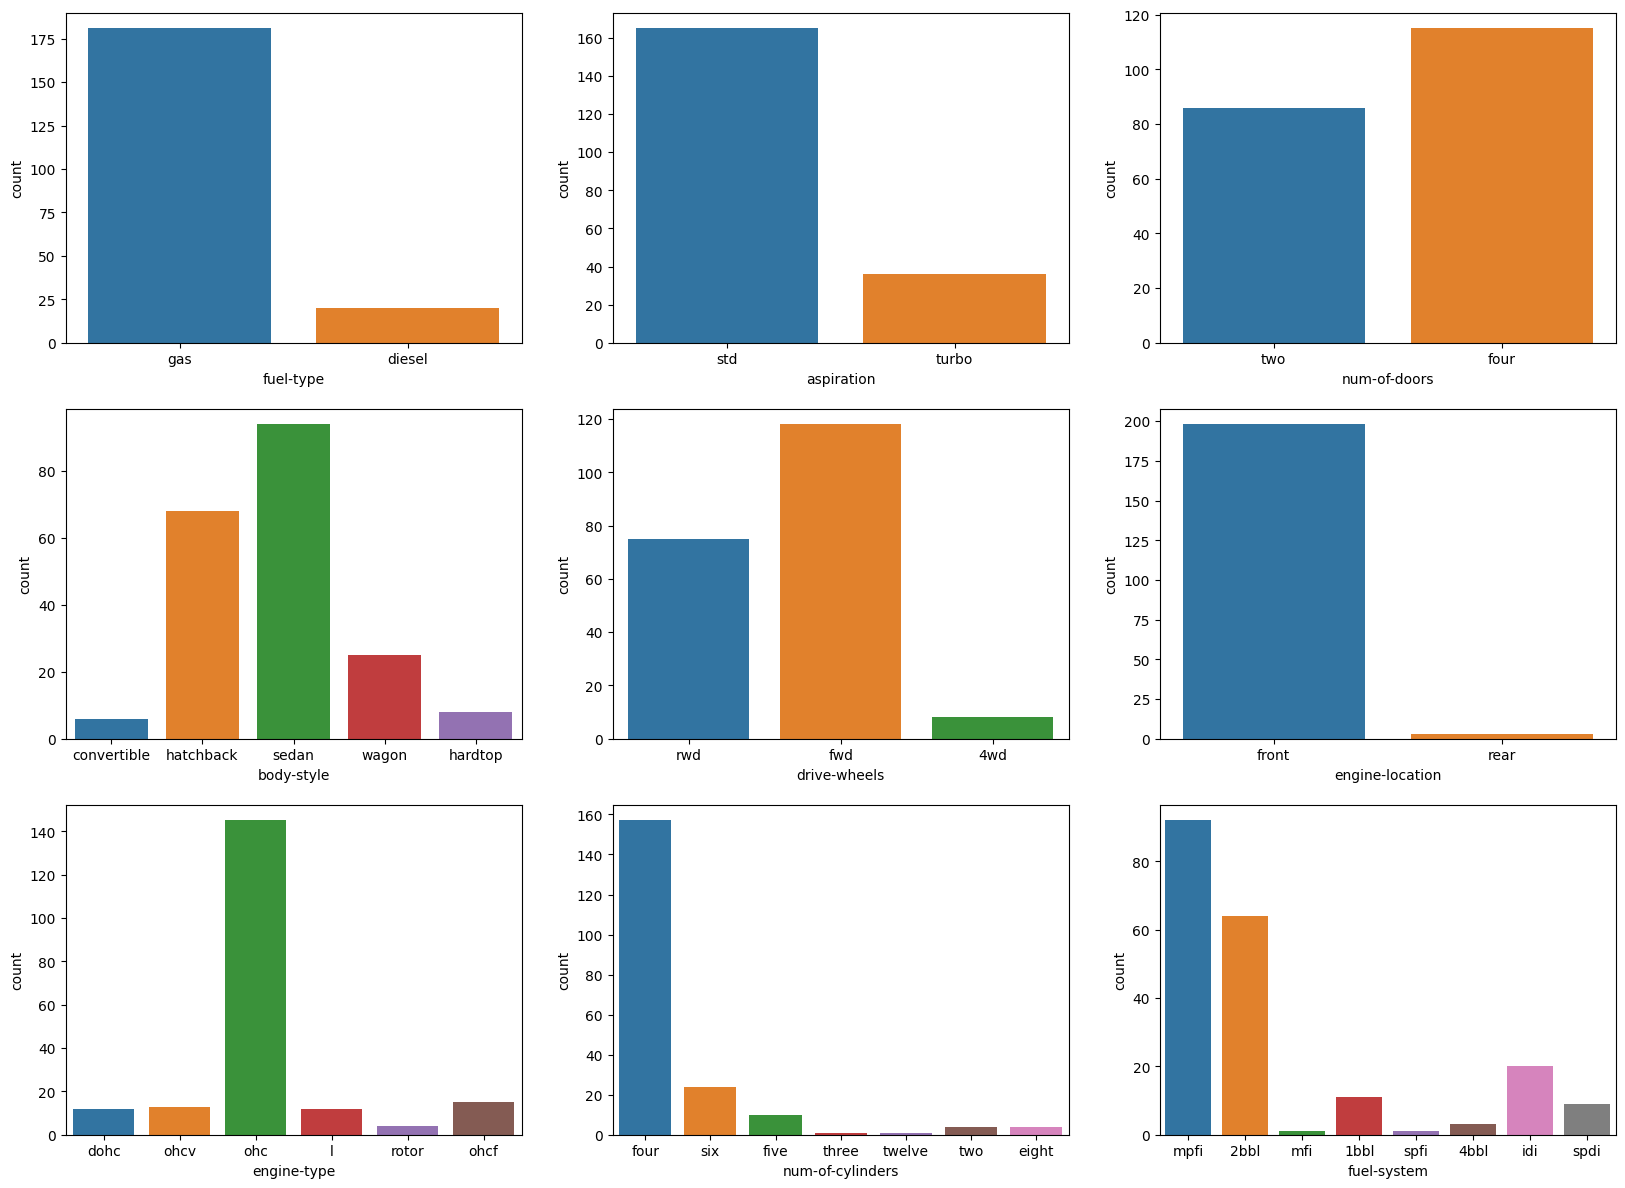

In [16]:
#Plotting other categorical variables
plt.figure(figsize=(20,30))

for i in enumerate(cat_graph):
    plt.subplot(6,3,i[0]+1)
    sns.countplot(x=i[1], data=df)

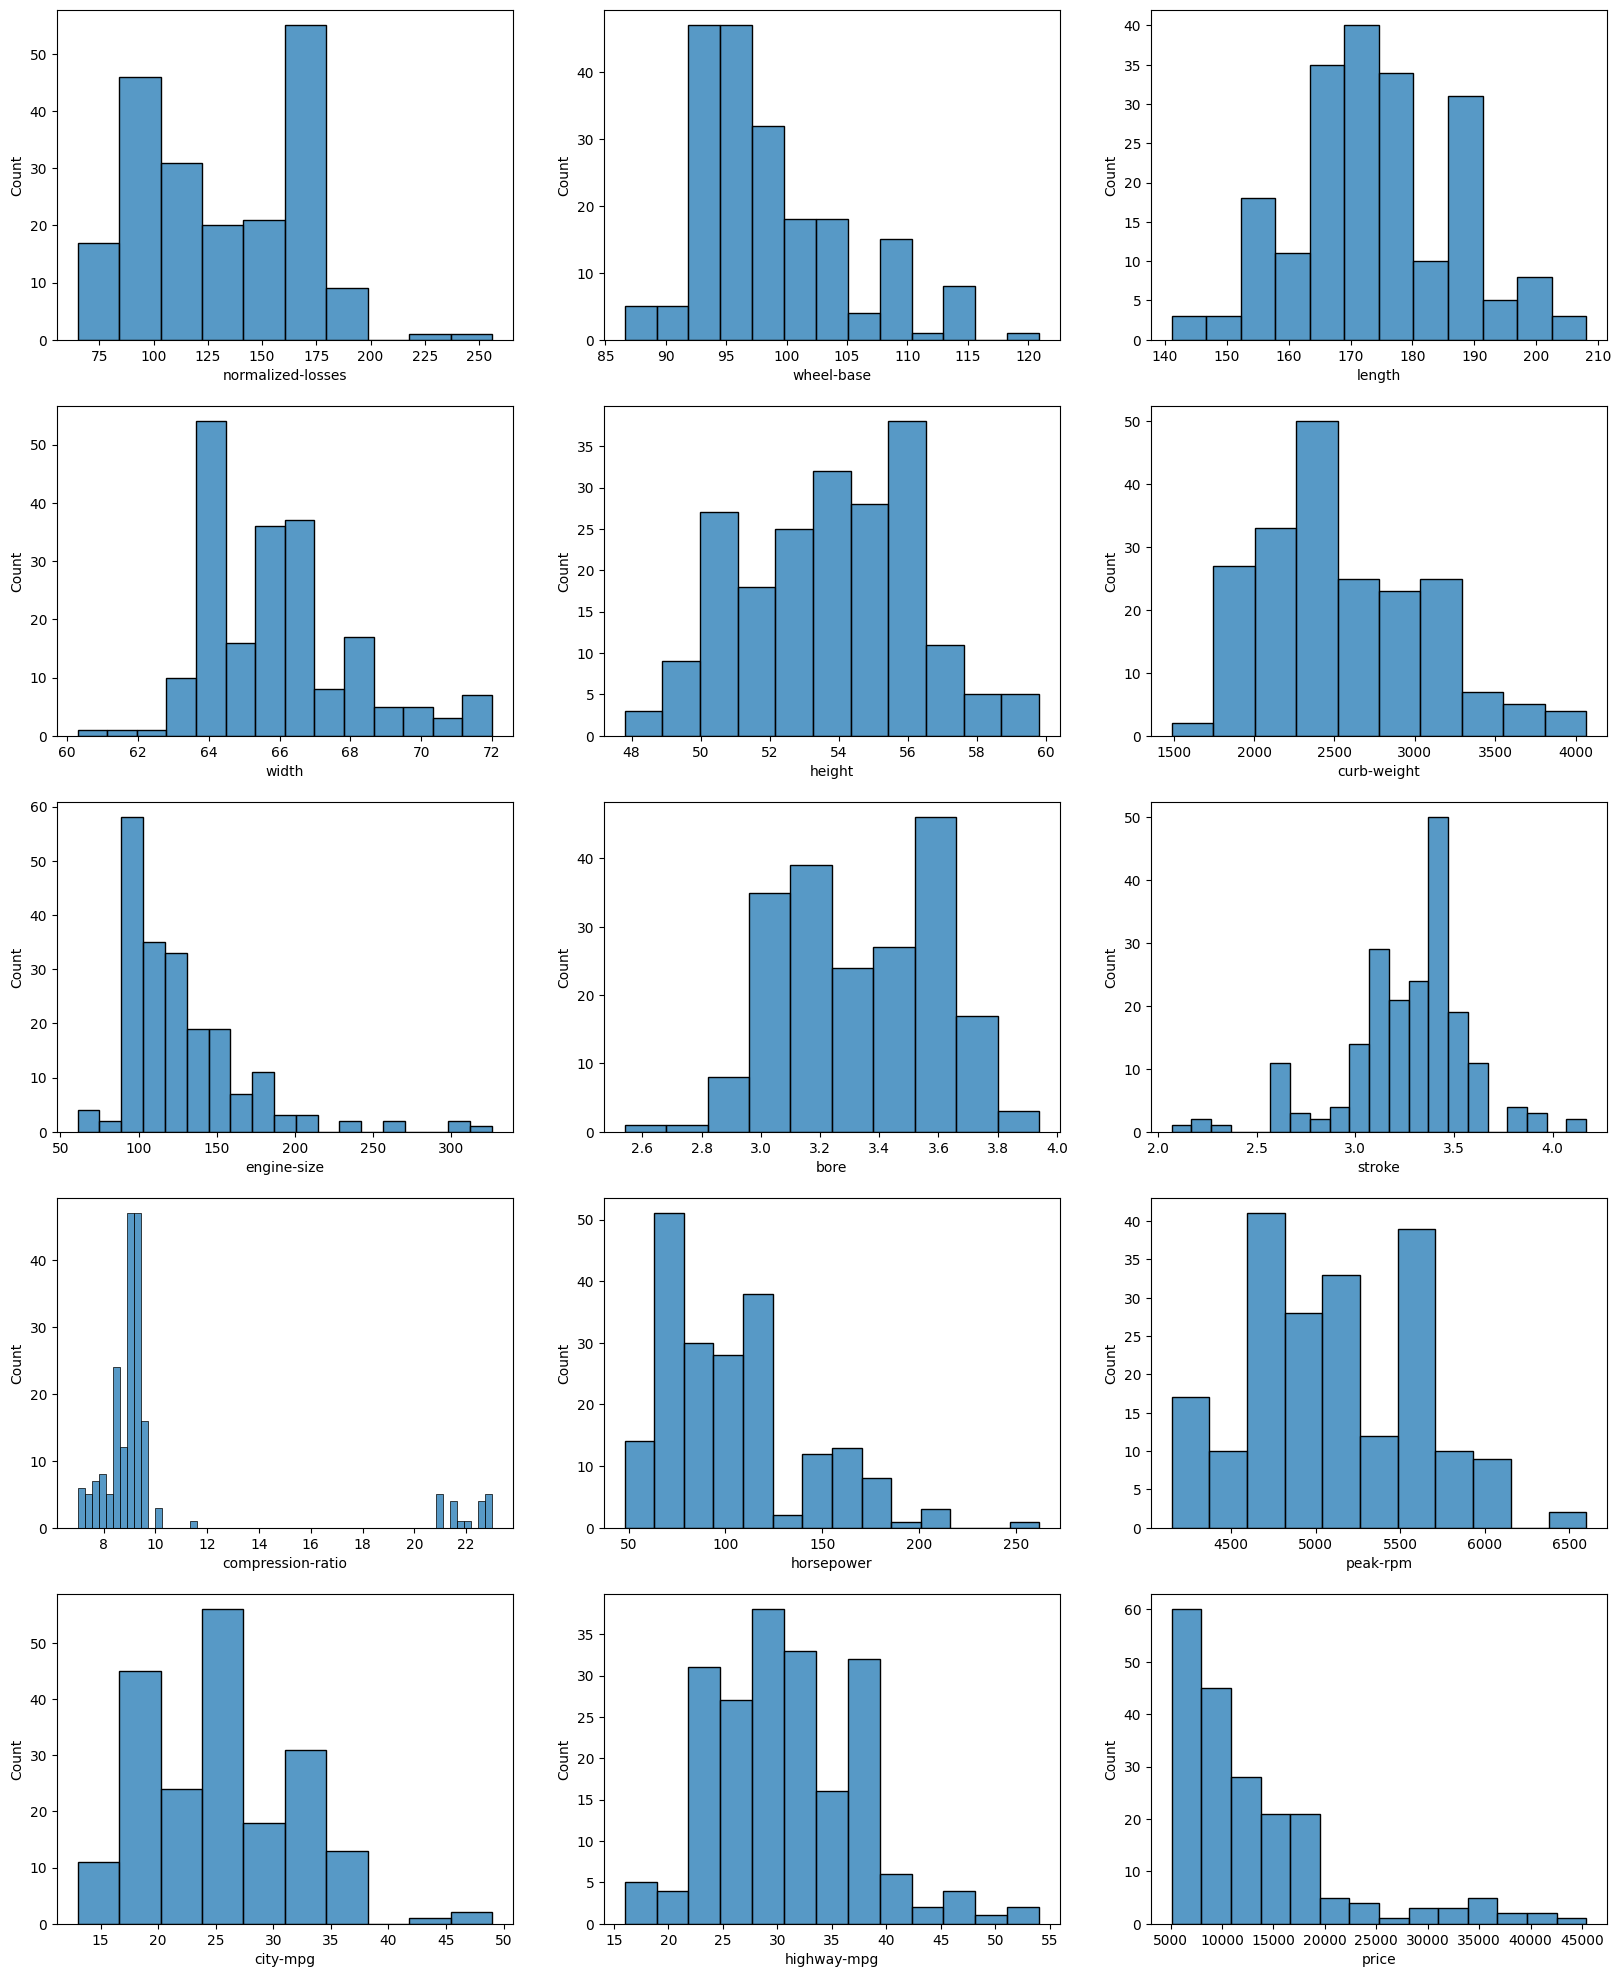

In [17]:
plt.figure(figsize=(20,30))

for i in enumerate(num.columns):
    plt.subplot(6,3,i[0]+1)
    sns.histplot(x=i[1], data=df)

# **Bivariate Analysis**

# Numerical Variables

<ipython-input-18-f935d65ccf88>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = df.corr()


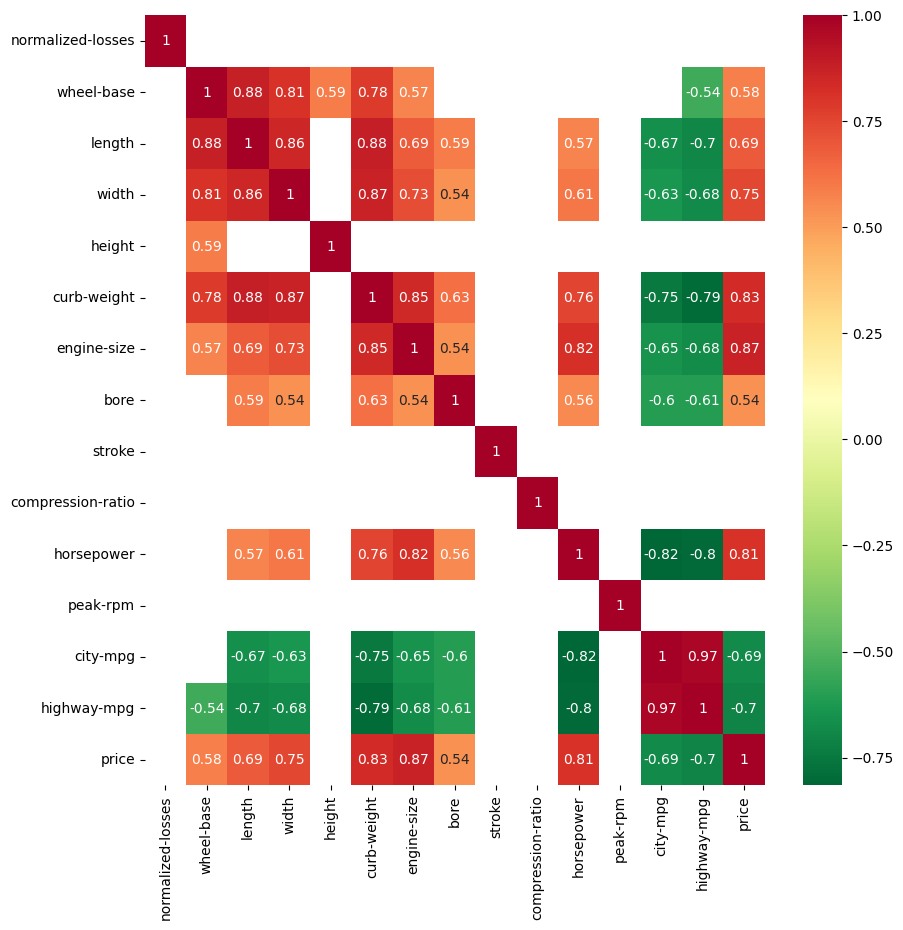

In [18]:
c = df.corr()
# Set a mask to filter out the lower correlations
mask = np.abs(c) < 0.5
# Plot the heatmap with the mask
plt.figure(figsize=(10,10))
sns.heatmap(c, cmap='RdYlGn_r', mask=mask, annot=True)
plt.show()

In [19]:
from scipy import stats

results = []

for col in num.columns:
  if col == 'price':
    continue
  else:
    c, p = stats.pearsonr(df[col], df['price'])
    results.append((col, c, p))

cor = pd.DataFrame(results, columns= ['variable', 'pearson_coef', 'p-value'])

In [20]:
significant = cor[cor['pearson_coef'] > 0.5]

In [21]:
significant

,variable,pearson_coef,p-value
1,wheel-base,0.584642,8.076488e-20
2,length,0.690628,8.016477e-30
3,width,0.751265,9.200336e-38
5,curb-weight,0.834415,2.189577e-53
6,engine-size,0.872335,9.265492e-64
7,bore,0.536556,2.215436e-16
10,horsepower,0.810395,4.331931e-48


In [22]:
sig_cols = significant.variable.tolist()
sig_cols.append('price')

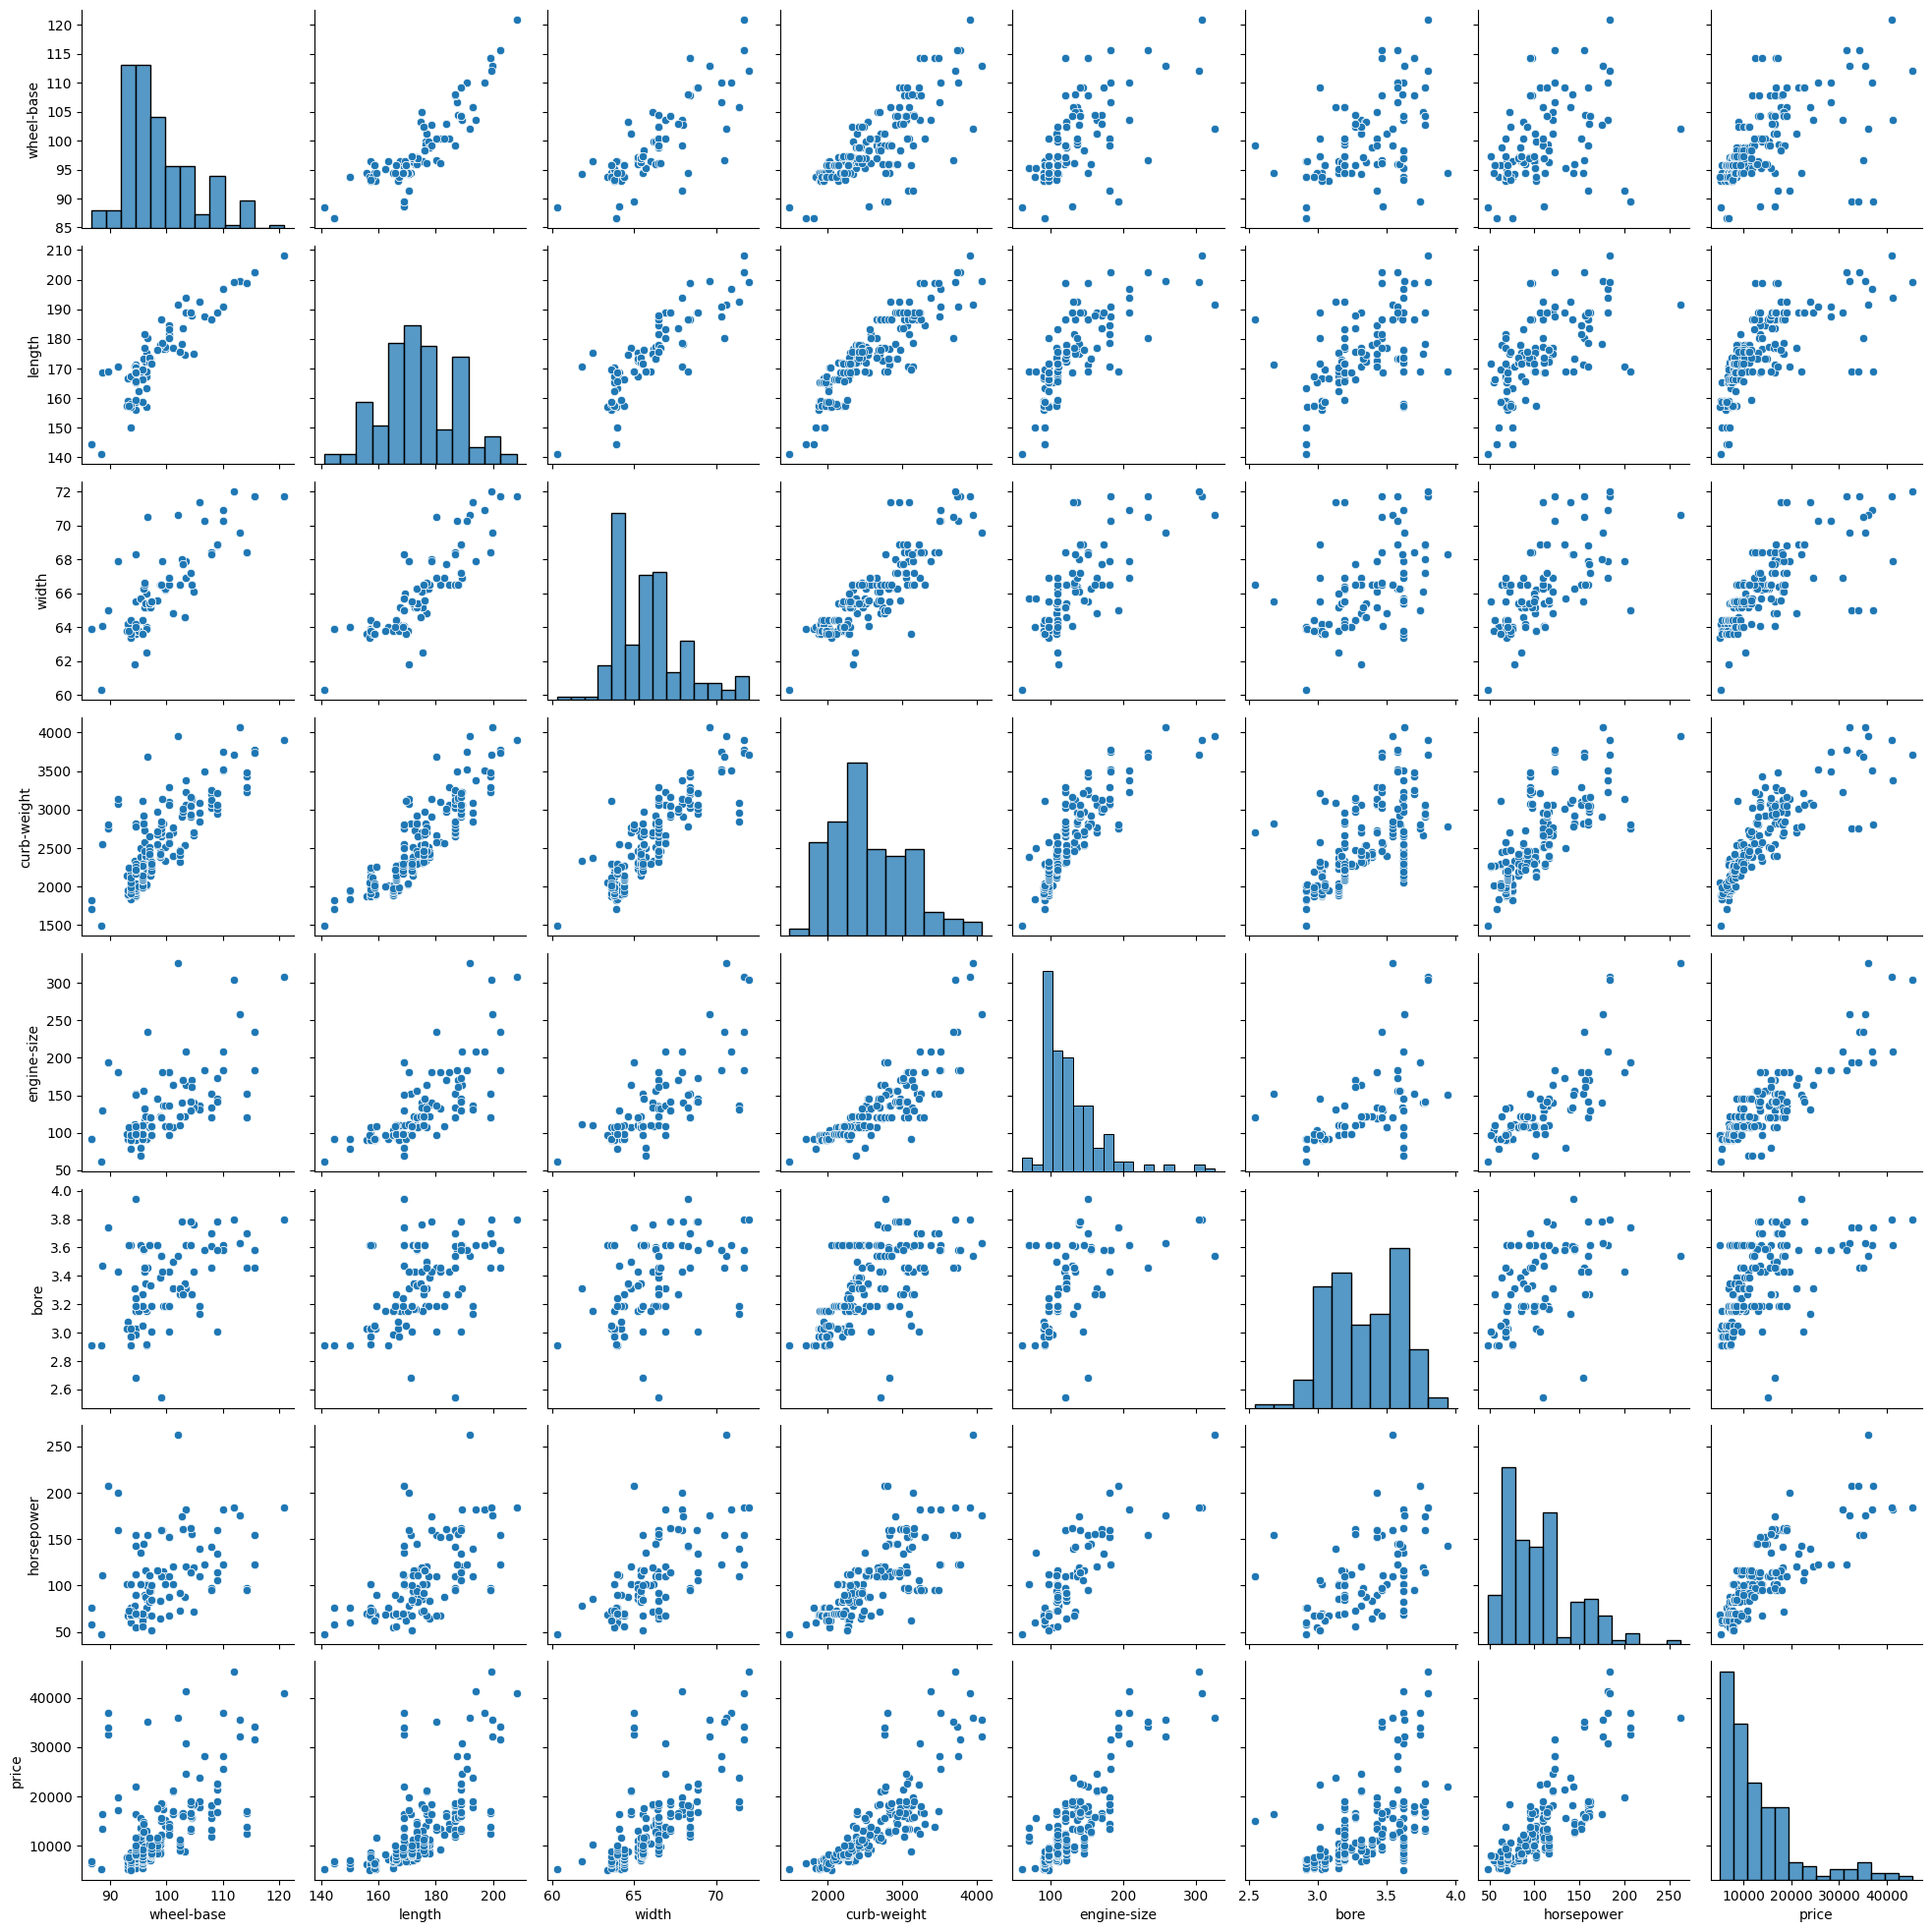

In [23]:
sns.pairplot(df[sig_cols])

In [24]:
df.columns

Index(['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

# Categorical Variables

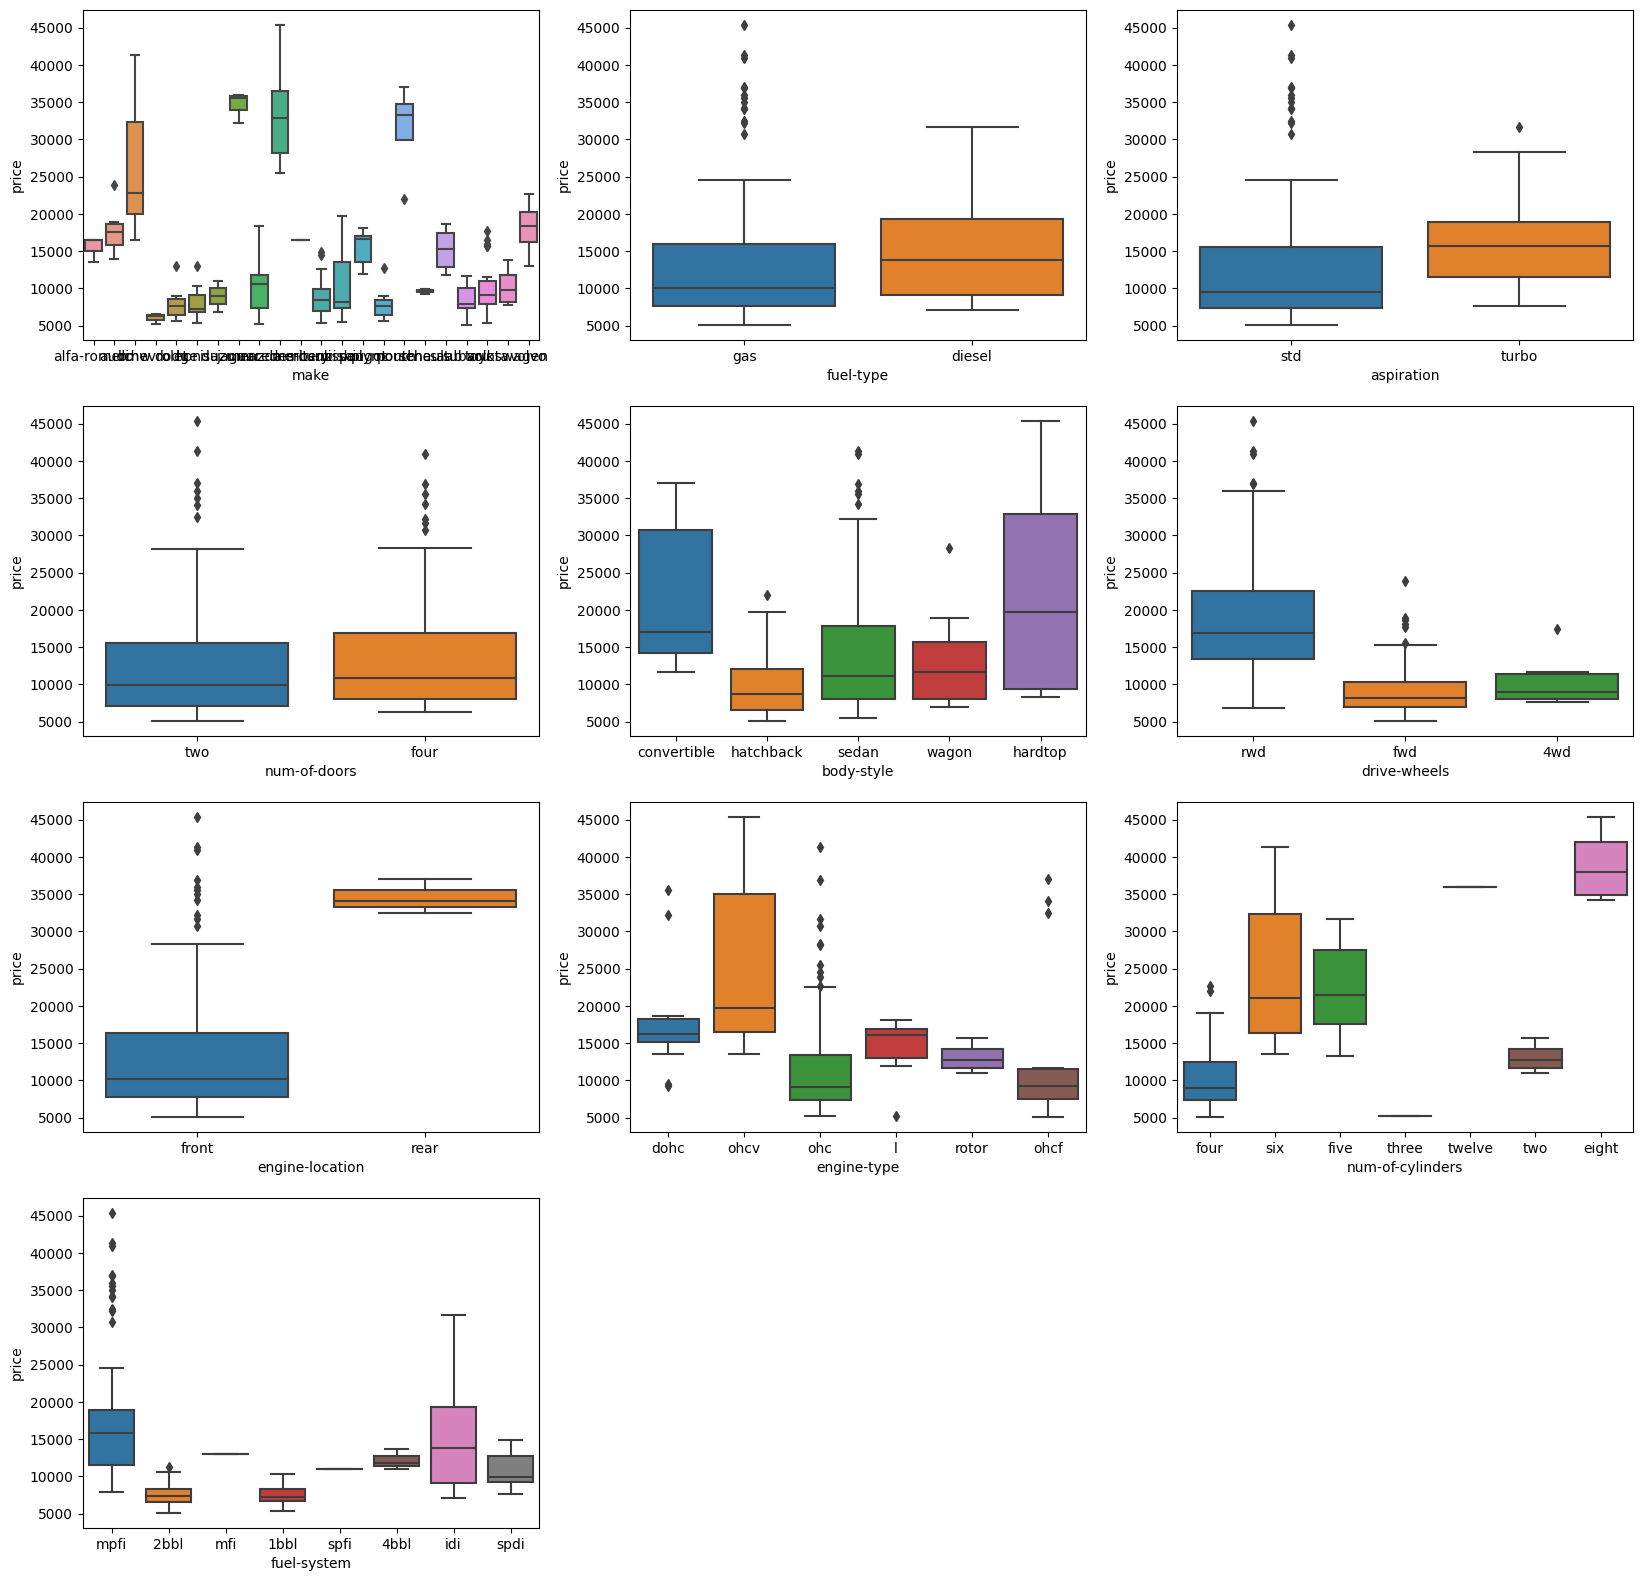

In [25]:
plt.figure(figsize=(20,30))

for i in enumerate(cat.columns):
    plt.subplot(6,3,i[0]+1)
    sns.boxplot(x=i[1], y='price', data=df)

By observing the boxplots above we can see that the **'engine-location'** and **'drive-wheels'** variables could be potential predictors of price because they both have distinct categories.

In [26]:
df = pd.concat([df, pd.get_dummies(df[['engine-location', 'drive-wheels']])], axis=1)
df.drop(['engine-location', 'drive-wheels'], axis=1, inplace=True)
df.columns

Index(['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore',
       'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'engine-location_front', 'engine-location_rear',
       'drive-wheels_4wd', 'drive-wheels_fwd', 'drive-wheels_rwd'],
      dtype='object')

In [27]:
X = df[['wheel-base',
 'length',
 'width',
 'curb-weight',
 'engine-size',
 'bore',
 'horsepower','engine-location_front', 'engine-location_rear',
       'drive-wheels_4wd', 'drive-wheels_fwd', 'drive-wheels_rwd'
      ]]
y = df['price']

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import time
from sklearn.metrics import mean_squared_error

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
from sklearn.metrics import r2_score
models = {
    "XGBRegressor": XGBRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "SVR": SVR()}

# Train and evaluate models
for name, model in models.items():
    # Fit model on train set
    model.fit(X_train, y_train)
    # Predict on test set
    y_pred = model.predict(X_test)
    # Compute accuracy score
    acc = r2_score(y_test, y_pred)
    # Print results
    print(f"{name} accuracy: {acc:.2f}")

XGBRegressor accuracy: 0.86
RandomForestRegressor accuracy: 0.91
DecisionTreeRegressor accuracy: 0.85
SVR accuracy: -0.07
